## 1.数据清洗

In [1]:
import pandas as pd
import re

In [28]:
df = pd.read_excel(r'F:\PythonCool\爬虫数据分析\贝壳2手房\上海二手房数据.xlsx')

In [29]:
df.sort_values(by='总价')

,标题,房子ID,地址,详情页,详情,总价,总价单位,均价,关注人数,地区,价格区间,户型
6181,新弘3区的产权车位，仅小区业主可以购买！！,107103360091,新弘国际城(公寓),https://sh.ke.com/xiaoqu/5011000012421/,地下室1室0厅|39.92平米|南,12.5,万,单价3132元/平米,1人关注/28天前发布,松江,bp0ep200,l1
2071,远洋香奈，地下产权车位，位置好，标准车位,107103436107,远洋香奈,https://sh.ke.com/xiaoqu/5011000010212/,地下室1室0厅|15平米|南西东北,16.0,万,单价10667元/平米,3人关注/6天前发布,宝山,bp0ep200,l1
6607,上海电子商城1室0厅南北,107103364862,上海电子商城,https://sh.ke.com/xiaoqu/5011000010178/,中楼层(共50层)|2009年建|1室0厅|8.68平米|南北,40.0,万,单价46083元/平米,0人关注/26天前发布,嘉定,bp0ep200,l1
6714,上海电子商城1房间0卫40万,107102559233,上海电子商城,https://sh.ke.com/xiaoqu/5011000010178/,中楼层(共50层)|2009年建|1室0厅|16.36平米|南,40.0,万,单价24450元/平米,30人关注/7月前发布,嘉定,bp0ep200,l1
8718,滨海一村+小户型低总价+业主诚意出售+价格可谈,107101880487,滨海一村,https://sh.ke.com/xiaoqu/5011000001492/,高楼层(共6层)|1986年建|1室1厅|31.1平米|南,48.0,万,单价15435元/平米,24人关注/1年前发布,金山,bp0ep200,l1
...,...,...,...,...,...,...,...,...,...,...,...,...
37334,合生一期D户型，临河大独栋，只有这一套在卖，毛坯,107102821071,合生东郊别墅(一期),https://sh.ke.com/xiaoqu/5011000012305/,低楼层(共2层)|2011年建|5室3厅|874.32平米|南,16000.0,万,单价183000元/平米,12人关注/5月前发布,浦东,bp1000ep100000,l5
37365,九间堂+内环中式园林独栋+与马云为邻+拥抱世纪公园,107000494507,九间堂,https://sh.ke.com/xiaoqu/5011000016750/,低楼层(共2层)|2006年建|5室3厅|789.19平米|东,16000.0,万,单价202740元/平米,239人关注/4年前发布,浦东,bp1000ep100000,l5
37330,位置好，二面临水，原始毛坯，浦东没有可比性，看房约,107103072571,九间堂,https://sh.ke.com/xiaoqu/5011000016750/,低楼层(共2层)|2006年建|5室2厅|863.63平米|南,17800.0,万,单价206107元/平米,28人关注/3月前发布,浦东,bp1000ep100000,l5
37340,品质冠绝东郊，五千万装修，恒温恒湿恒氧，满五唯一,107102305054,东郊壹号,https://sh.ke.com/xiaoqu/5011000010435/,低楼层(共2层)|2011年建|5室3厅|840.57平米|南,21000.0,万,单价249831元/平米,59人关注/9月前发布,浦东,bp1000ep100000,l5


In [30]:
# 车位条件，不一定严谨
mask = ((df['详情'].str.contains('地下室')) 
#         & (df['详情'].str.contains('1室'))
#         &(~df['详情'].str.contains(r'地下室\(共[2-9]|[1-9]\d+层\)'))
       )|((df['详情'].str.contains('底层')) & (df['详情'].str.contains('1室'))
           &(~df['详情'].str.contains(r'底层\(共[2-9]|[1-9]\d+层\)'))
         )

In [31]:
# 房子
house = df[~mask]

In [32]:
# 车位
carport = df[mask]

In [33]:
carport.sort_values(by='总价')

,标题,房子ID,地址,详情页,详情,总价,总价单位,均价,关注人数,地区,价格区间,户型
6181,新弘3区的产权车位，仅小区业主可以购买！！,107103360091,新弘国际城(公寓),https://sh.ke.com/xiaoqu/5011000012421/,地下室1室0厅|39.92平米|南,12.5,万,单价3132元/平米,1人关注/28天前发布,松江,bp0ep200,l1
2071,远洋香奈，地下产权车位，位置好，标准车位,107103436107,远洋香奈,https://sh.ke.com/xiaoqu/5011000010212/,地下室1室0厅|15平米|南西东北,16.0,万,单价10667元/平米,3人关注/6天前发布,宝山,bp0ep200,l1
3513,此房为地下产权车位，业主诚意出售，方便看,107102461660,金沙雅苑(三期),https://sh.ke.com/xiaoqu/5011000017951/,地下室(共1层)1室0厅|30.49平米|南北,52.0,万,单价17055元/平米,25人关注/8月前发布,普陀,bp0ep200,l1
7292,云海苑的车位一个，欢迎来看，价格可谈,107103405428,云海苑,https://sh.ke.com/xiaoqu/5011000018083/,地下室1室0厅|34.25平米|南,85.0,万,单价24818元/平米,5人关注/15天前发布,静安,bp0ep200,l1
37908,佘山下月湖旁一栋定江山,107000374217,佘山高尔夫郡,https://sh.ke.com/xiaoqu/5011000017618/,地下室(共2层)|2005年建|5室4厅|1000.2平米|南,8000.0,万,单价79985元/平米,53人关注/3年前发布,松江,bp1000ep100000,l5


In [34]:
house.sample(10)

,标题,房子ID,地址,详情页,详情,总价,总价单位,均价,关注人数,地区,价格区间,户型
4077,业主诚意出售，全明小户型，适合小夫妻，看房方便！,107100216700,德怡苑,https://sh.ke.com/xiaoqu/5011000018188/,高楼层(共7层)|1985年建|1室1厅|39.84平米|南北,295.0,万,单价74047元/平米,43人关注/2年前发布,普陀,bp250ep300,l1
31729,满五唯一，小区位置好，精装修，业主诚意,107103114450,贝尚湾(公寓),https://sh.ke.com/xiaoqu/5011000012017/,低楼层(共16层)|2009年建|3室2厅|143.46平米|南,800.0,万,单价55765元/平米,16人关注/3月前发布,松江,bp700ep800,l3
11996,九号线金桥站五分中距离，非顶非底全明户型隔音好！,107103444783,金桥新城,https://sh.ke.com/xiaoqu/5011000017084/,低楼层(共14层)|2005年建|2室2厅|105.56平米|南,680.0,万,单价64419元/平米,12人关注/3天前发布,浦东,bp600ep700,l2
9185,此房高楼层，户型方正，南北通户型，小区位置好,107103147587,百晨小区,https://sh.ke.com/xiaoqu/5011000000011/,高楼层(共6层)|2001年建|2室2厅|92.55平米|南,240.0,万,单价25932元/平米,13人关注/2月前发布,浦东,bp200ep250,l2
18995,欣绿小区2室1厅南,107103434414,欣绿小区,https://sh.ke.com/xiaoqu/5011000017861/,低楼层(共6层)|1980年建|2室1厅|53.9平米|南,380.0,万,单价70501元/平米,4人关注/6天前发布,长宁,bp300ep400,l2
6313,中星佘山溪语1室0厅西北,107100193298,中星佘山溪语,https://sh.ke.com/xiaoqu/5011000003479/,中楼层(共9层)|2013年建|1室0厅|96.62平米|西北,268.0,万,单价27738元/平米,16人关注/2年前发布,松江,bp250ep300,l1
18247,2011年电梯房有车库，免增值税，小区前排中区全南户型,107102673329,城市方园,https://sh.ke.com/xiaoqu/5011000002896/,中楼层(共33层)|2011年建|2室2厅|70.26平米|南,350.0,万,单价49815元/平米,108人关注/6月前发布,杨浦,bp300ep400,l2
13920,2房南北直通蕞好户型地铁近配套好诚意卖,107103343318,金汇花园四街坊,https://sh.ke.com/xiaoqu/5011000017887/,低楼层(共7层)|1995年建|2室2厅|104.1平米|南,610.0,万,单价58598元/平米,36人关注/1月前发布,闵行,bp600ep700,l2
26694,品质小区人车分流户型正气配套成熟精装修中央空调,107103266868,九龙仓兰廷,https://sh.ke.com/xiaoqu/5011062976126/,低楼层(共18层)|2016年建|3室1厅|89平米|南,520.0,万,单价58427元/平米,30人关注/1月前发布,浦东,bp500ep600,l3
13241,靠三号门距离200米到文莱精装满二前后无遮挡,107103130751,爱博二村,https://sh.ke.com/xiaoqu/5011102207798/,低楼层(共13层)|2009年建|2室2厅|77.65平米|南北,385.0,万,单价49582元/平米,112人关注/3月前发布,闵行,bp300ep400,l2


In [35]:
# 详情信息解析
s = '中楼层(共9层)|2007年建|1室1厅|24.78平米|北'
# s = '地下室|2014年建|1室0厅|39.52平米|东'
# s = '底层(共2层)5室3厅|326.56平米|东南西北'
# s = '地下室1室0厅|11.9平米|南'
# re.split(r'(.+?)(\(共(.*)层\))*(\|((.*)年建)*\|)*?(\d+室.*?)\|(.*)平米\|(.*)',s)
re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',s)

['', '中楼层', '9', '2007', '1室1厅', '24.78', '北', '']

In [36]:
for i, s in enumerate(house['详情'].to_list()):
    try:
        a = re.split(r'(.+?)(\(共(.*)层\))*(\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',s)
    except Exception as e:
        print(e)
        print(s,i)

In [37]:
houseData = house.copy()

In [38]:
houseData.loc[:,'楼层'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[1])
houseData.loc[:,'楼高'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[2])
houseData.loc[:,'建筑年份'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[3])
houseData.loc[:,'户型'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[4])
houseData.loc[:,'面积'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[5])
houseData.loc[:,'朝向'] = houseData['详情'].apply(lambda x : re.split(r'(.+?)(?:\(共(.*)层\))?(?:\|(.*)年建\|)*?(\d+室.*?)\|(.*)平米\|(.*)',x)[6])

In [39]:
houseData.reset_index(drop=True, inplace=True)

In [40]:
houseData.sort_values(by='总价')

,标题,房子ID,地址,详情页,详情,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向
6711,上海电子商城1房间0卫40万,107102559233,上海电子商城,https://sh.ke.com/xiaoqu/5011000010178/,中楼层(共50层)|2009年建|1室0厅|16.36平米|南,40.0,万,单价24450元/平米,30人关注/7月前发布,嘉定,bp0ep200,1室0厅,中楼层,50,2009,16.36,南
6604,上海电子商城1室0厅南北,107103364862,上海电子商城,https://sh.ke.com/xiaoqu/5011000010178/,中楼层(共50层)|2009年建|1室0厅|8.68平米|南北,40.0,万,单价46083元/平米,0人关注/26天前发布,嘉定,bp0ep200,1室0厅,中楼层,50,2009,8.68,南北
8714,滨海一村+小户型低总价+业主诚意出售+价格可谈,107101880487,滨海一村,https://sh.ke.com/xiaoqu/5011000001492/,高楼层(共6层)|1986年建|1室1厅|31.1平米|南,48.0,万,单价15435元/平米,24人关注/1年前发布,金山,bp0ep200,1室1厅,高楼层,6,1986,31.1,南
8694,首付9.6万起+中间楼层+低总价+户型好位置好,107103329779,滨海一村,https://sh.ke.com/xiaoqu/5011000001492/,中楼层(共6层)|1986年建|1室1厅|31平米|南,53.0,万,单价17097元/平米,27人关注/1月前发布,金山,bp0ep200,1室1厅,中楼层,6,1986,31,南
6716,中贸世纪财富广场，一室低价房源诚意出售,107102495140,中茂世纪财富广场,https://sh.ke.com/xiaoqu/5011000002086/,高楼层(共17层)1室1厅|39.04平米|南,55.0,万,单价14089元/平米,22人关注/7月前发布,嘉定,bp0ep200,1室1厅,高楼层,17,None,39.04,南
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37330,合生一期D户型，临河大独栋，只有这一套在卖，毛坯,107102821071,合生东郊别墅(一期),https://sh.ke.com/xiaoqu/5011000012305/,低楼层(共2层)|2011年建|5室3厅|874.32平米|南,16000.0,万,单价183000元/平米,12人关注/5月前发布,浦东,bp1000ep100000,5室3厅,低楼层,2,2011,874.32,南
37361,九间堂+内环中式园林独栋+与马云为邻+拥抱世纪公园,107000494507,九间堂,https://sh.ke.com/xiaoqu/5011000016750/,低楼层(共2层)|2006年建|5室3厅|789.19平米|东,16000.0,万,单价202740元/平米,239人关注/4年前发布,浦东,bp1000ep100000,5室3厅,低楼层,2,2006,789.19,东
37326,位置好，二面临水，原始毛坯，浦东没有可比性，看房约,107103072571,九间堂,https://sh.ke.com/xiaoqu/5011000016750/,低楼层(共2层)|2006年建|5室2厅|863.63平米|南,17800.0,万,单价206107元/平米,28人关注/3月前发布,浦东,bp1000ep100000,5室2厅,低楼层,2,2006,863.63,南
37336,品质冠绝东郊，五千万装修，恒温恒湿恒氧，满五唯一,107102305054,东郊壹号,https://sh.ke.com/xiaoqu/5011000010435/,低楼层(共2层)|2011年建|5室3厅|840.57平米|南,21000.0,万,单价249831元/平米,59人关注/9月前发布,浦东,bp1000ep100000,5室3厅,低楼层,2,2011,840.57,南


In [41]:
# 均价信息解析
houseData['均价'] = houseData['均价'].str.extract(r'(\d+)')

In [42]:
houseData['发布时间'] = houseData['关注人数'].str.extract(r'\/(\d+[年|月|日])') 

In [43]:
houseData['关注人数'] = houseData['关注人数'].str.extract(r'(\d+)人关注')

In [44]:
houseData.head()

,标题,房子ID,地址,详情页,详情,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
0,配套成熟，凌空路地铁2号线，经典户型，南北通采光足,107103383282,天环苑,https://sh.ke.com/xiaoqu/5011000010210/,中楼层(共6层)|2008年建|1室1厅|55.08平米|南北,173.0,万,31409,10,浦东,bp0ep200,1室1厅,中楼层,6,2008,55.08,南北,NaN
1,中八村，低楼层出入方便，双轨道交汇（6+10）,107103402912,潼港八村,https://sh.ke.com/xiaoqu/5011000014832/,低楼层(共6层)|1995年建|1室1厅|44.09平米|南,188.0,万,42641,17,浦东,bp0ep200,1室1厅,低楼层,6,1995,44.09,南,NaN
2,一手动迁满五唯一税费少，简单装修，业主诚心出售,107103369216,鹤沙航城东茗苑,https://sh.ke.com/xiaoqu/5011000003404/,低楼层(共18层)|2012年建|1室1厅|59.17平米|南,180.0,万,30421,16,浦东,bp0ep200,1室1厅,低楼层,18,2012,59.17,南,NaN
3,阳光苑新上一房带院子的满五年唯一随时可以看房,107103343066,阳光苑民同路10弄40弄,https://sh.ke.com/xiaoqu/5020043653920397/,低楼层(共6层)|1994年建|1室1厅|47.5平米|南,185.0,万,38948,21,浦东,bp0ep200,1室1厅,低楼层,6,1994,47.5,南,1月
4,中间楼层，采光明亮，1室1厅，装修不错,107103332082,曙航苑,https://sh.ke.com/xiaoqu/5011000003416/,中楼层(共6层)|1994年建|1室1厅|38.61平米|南,165.0,万,42736,13,浦东,bp0ep200,1室1厅,中楼层,6,1994,38.61,南,1月


In [45]:
houseData.columns

Index(['标题', '房子ID', '地址', '详情页', '详情', '总价', '总价单位', '均价', '关注人数', '地区',
       '价格区间', '户型', '楼层', '楼高', '建筑年份', '面积', '朝向', '发布时间'],
      dtype='object')

In [46]:
ershoufang = houseData[[ '房子ID', '地址',  '总价', '总价单位', '均价', '关注人数', '地区',
                       '价格区间', '户型', '楼层', '楼高', '建筑年份', '面积', '朝向', '发布时间']]

In [47]:
ershoufang

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
0,107103383282,天环苑,173.0,万,31409,10,浦东,bp0ep200,1室1厅,中楼层,6,2008,55.08,南北,NaN
1,107103402912,潼港八村,188.0,万,42641,17,浦东,bp0ep200,1室1厅,低楼层,6,1995,44.09,南,NaN
2,107103369216,鹤沙航城东茗苑,180.0,万,30421,16,浦东,bp0ep200,1室1厅,低楼层,18,2012,59.17,南,NaN
3,107103343066,阳光苑民同路10弄40弄,185.0,万,38948,21,浦东,bp0ep200,1室1厅,低楼层,6,1994,47.5,南,1月
4,107103332082,曙航苑,165.0,万,42736,13,浦东,bp0ep200,1室1厅,中楼层,6,1994,38.61,南,1月
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38221,107103283267,东泉新村,370.0,万,20069,1,金山,bp300ep400,5室2厅,高楼层,4,2001,184.37,南,1月
38222,107102403133,金海岸花园,310.0,万,18344,0,金山,bp300ep400,5室3厅,高楼层,6,2003,169,南,8月
38223,107102221392,金海岸花园,448.0,万,21942,11,金山,bp400ep500,5室3厅,高楼层,16,2003,204.18,南,10月
38224,107101911251,辰凯花苑,465.0,万,22892,19,金山,bp400ep500,5室3厅,低楼层,3,1998,203.13,南,1年


In [48]:
ershoufang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38226 entries, 0 to 38225
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   房子ID    38226 non-null  int64  
 1   地址      38226 non-null  object 
 2   总价      38226 non-null  float64
 3   总价单位    38226 non-null  object 
 4   均价      38226 non-null  object 
 5   关注人数    38226 non-null  object 
 6   地区      38226 non-null  object 
 7   价格区间    38226 non-null  object 
 8   户型      38226 non-null  object 
 9   楼层      38226 non-null  object 
 10  楼高      38226 non-null  object 
 11  建筑年份    35648 non-null  object 
 12  面积      38226 non-null  object 
 13  朝向      38226 non-null  object 
 14  发布时间    30399 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.4+ MB


In [49]:
ershoufang.loc[:,['均价','关注人数']] = ershoufang.loc[:,['均价','关注人数']].astype(int)

C:\Users\Gdc\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [50]:
ershoufang['面积'] = ershoufang['面积'].astype(float)

<ipython-input-50-d4623747eced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ershoufang['面积'] = ershoufang['面积'].astype(float)


In [51]:
ershoufang.sort_values(by='均价')

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
14827,107103430046,美罗家园罗翔苑,290.00,万,1,1,宝山,bp250ep300,2室2厅,低楼层,18,None,4.319890e+06,南,NaN
13355,107103454678,南方新村,360.00,万,1,5,闵行,bp300ep400,2室1厅,中楼层,6,1993,1.555630e+08,西南,NaN
9124,107103381159,东亚阳光里,215.00,万,75,4,浦东,bp200ep250,2室1厅,低楼层,11,2017,2.887600e+04,南北,NaN
22055,107103406951,西凌新邨,510.00,万,93,20,黄浦,bp500ep600,2室0厅,低楼层,7,1992,5.491400e+04,南,NaN
20846,107103451932,塔城路800弄,168.00,万,102,2,嘉定,bp0ep200,2室1厅,低楼层,6,1997,1.649400e+04,南北,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37770,107100638747,兴国路320号,7202.64,万,318560,119,长宁,bp1000ep100000,5室3厅,低楼层,3,2010,2.261000e+02,东南西北,2年
30790,107100638725,兴国路322号,2854.29,万,318560,41,长宁,bp1000ep100000,3室2厅,低楼层,2,1948,8.960000e+01,东南西北,2年
37772,107100638739,兴国路322号,12943.10,万,318561,44,长宁,bp1000ep100000,5室3厅,低楼层,3,1948,4.063000e+02,东南西北,2年
37624,107102815900,康平路17号,13900.00,万,359174,106,徐汇,bp1000ep100000,5室2厅,低楼层,1,1935,3.870000e+02,南,5月


In [52]:
# 二手房源数
ershoufang.房子ID.nunique()

38226

In [54]:
ershoufang.to_excel(r'F:\PythonCool\爬虫数据分析\贝壳2手房\上海二手房data.xlsx',index=None)

## 2.数据统计及可视化

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft YaHei'] #设置全局默认字体 为 幼圆
plt.rcParams['axes.unicode_minus'] = False # 解决中文字体下负号显示问题
plt.rcParams["axes.labelsize"] = 16  # 设置全局轴标签字典大小

import seaborn as sns
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})   #seaborn绘图的字体设置

from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import *  

In [28]:
data = ershoufang.copy()

### 各地区二手房源数

In [29]:
# 各地区二手房源数
beijing = data.groupby('地区',as_index=False)['房子ID'].count().sort_values('房子ID',ascending=False).reset_index(drop=True)
beijing.loc[~beijing['地区'].str.endswith('区'),'地区']=beijing['地区']+'区'

In [30]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.charts import *  

In [105]:
# 绘制地图（区）
c = (
    Map(init_opts=opts.InitOpts(theme='dark', width='800px'))
    .add("房源数", [list(z) for z in zip(beijing['地区'].to_list(), beijing['房子ID'].to_list())], "北京", label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="贝壳北京二手房源数分布",
                                 subtitle='数据采集日期：2020年12月'), 
        visualmap_opts=opts.VisualMapOpts(max_=15000)
    )    
)
# c.render('map_beijing.html')

In [32]:
c.load_javascript()

In [106]:
c.render_notebook()

In [34]:
# 绘制柱状图
bar = (Bar(init_opts=opts.InitOpts(theme='dark', width='800px'))
            .add_xaxis(beijing['地区'].to_list())
            .add_yaxis("", beijing['房子ID'].to_list())
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, 
                                                       position='right',
                                                       font_style='italic'),
                            itemstyle_opts=opts.ItemStyleOpts(
                                color=JsCode("""new echarts.graphic.LinearGradient(1, 0, 0, 0, 
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(255,99,71)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(32,178,170)'
                                             }])"""))
                            )
            .set_global_opts(
                title_opts=opts.TitleOpts(title="贝壳北京二手房源数量",
                                         subtitle='数据采集日期：2020年12月'),
                xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                legend_opts=opts.LegendOpts(is_show=True))
            .reversal_axis()
        )
bar.render_notebook()

In [35]:
# 富文本
rich_text = {
    "a": {"color": "#999", "lineHeight": 22, "align": "center"},
    "b": {"fontSize": 12, "lineHeight": 33},
    "per": {
        "color": "#eee",
        "backgroundColor": "#334455",
        "padding": [2, 4],
        "borderRadius": 2,
    },
}

location = beijing['地区'].to_list()
num = beijing['房子ID'].to_list()

pie = (Pie(init_opts=opts.InitOpts(theme='dark', width='800px',
                                   height='560px',
                                  ))
       .add('二手房源数', [list(z) for z in zip(location, num)],
            radius=200, #设置饼图半径
            label_opts=opts.LabelOpts(position='outsiede',
                                     formatter="{b|{b}: }{c}  {per|{d}%}  ",
                                     rich=rich_text))
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=False),
                       title_opts=opts.TitleOpts(title="贝壳北京各区二手房源数量占比",
                                         subtitle='数据采集日期：2020年12月'),)
       )
pie.render_notebook()

In [36]:
# 楼层类型分布
houseType = data.pivot_table(values='房子ID',index='地区',columns='楼层',aggfunc='count').fillna('')

In [37]:
# 绘制楼层类型分布
bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='800px'))
    .add_xaxis(houseType.index.to_list())
    .add_yaxis('底层', houseType['底层'].to_list(),stack=True)
    .add_yaxis('低楼层', houseType['低楼层'].to_list(),stack=True)
    .add_yaxis('中楼层', houseType['中楼层'].to_list(),stack=True)
    .add_yaxis('高楼层', houseType['高楼层'].to_list(),stack=True)
    .add_yaxis('顶层', houseType['顶层'].to_list(),stack=True)    
    
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_bottom='90%'),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房楼层分布",
                                         subtitle='数据采集日期：2020年12月'),
                    ) 
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               # 标签的位置。可选
                                               # 'top'，'left'，'right'，'bottom'，'inside'，'insideLeft'，'insideRight'
                                               # 'insideTop'，'insideBottom'， 'insideTopLeft'，'insideBottomLeft'
                                               # 'insideTopRight'，'insideBottomRight'
                                               position='inside'))    
)

bar.render_notebook()

In [38]:
data[data['地区']=='西城'].head()

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
3007,101109965630,茶贸国际中心,87.0,万,25036,26,西城,bp0ep200,1室0厅,高楼层,20,2006,34.75,西,NaN
3008,101109795453,茶贸国际中心,79.0,万,31412,33,西城,bp0ep200,1室0厅,高楼层,20,2006,25.15,西,1月
3009,101109557183,茶贸国际中心,88.0,万,25716,17,西城,bp0ep200,1室0厅,中楼层,21,2008,34.22,北,2月
3010,101109076844,茶贸国际中心,86.0,万,25132,25,西城,bp0ep200,1室0厅,低楼层,20,2008,34.22,西,3月
3011,101110028245,第三区,158.0,万,46996,8,西城,bp0ep200,1室0厅,低楼层,18,2011,33.62,北,NaN


In [39]:
xiaoqu = data.groupby(['地区','地址'],as_index=False)['房子ID'].count().sort_values(['地区','房子ID'],ascending=False).reset_index(drop=True)
xiaoqu = xiaoqu[xiaoqu['地址']!='']

In [40]:
xiaoqu[xiaoqu['地区']=='朝阳'].head()

,地区,地址,房子ID
2565,朝阳,芍药居北里,143
2566,朝阳,兴隆家园,108
2567,朝阳,安贞西里,106
2568,朝阳,安贞里,97
2569,朝阳,富力又一城C区,96


In [41]:
xiaoqu[xiaoqu['地区']=='海淀'].head()

,地区,地址,房子ID
1565,海淀,保利西山林语,69
1566,海淀,今典花园,42
1567,海淀,凯盛家园,41
1568,海淀,京投银泰琨御府,39
1569,海淀,正源尚峰尚水,39


In [42]:
xiaoqu[xiaoqu['地区']=='丰台'].head()

,地区,地址,房子ID
5478,丰台,三环新城7号院,93
5479,丰台,天伦锦城,87
5480,丰台,广安﹒康馨家园,78
5481,丰台,银地家园,78
5482,丰台,角门东里,77


In [43]:
xiaoqu[xiaoqu['地区']=='昌平'].head()

,地区,地址,房子ID
3969,昌平,天通苑北一区,167
3970,昌平,天通苑中苑,166
3971,昌平,天通苑东一区,156
3972,昌平,天通西苑三区,136
3973,昌平,天通苑北二区,109


In [44]:
# 绘制组合图
bar1 = (Bar()
       .add_xaxis(xiaoqu[xiaoqu['地区']=='朝阳'].head()['地址'].to_list())
       .add_yaxis('朝阳区', xiaoqu[xiaoqu['地区']=='朝阳'].head()['房子ID'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="10%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区的小区二手房源数前5名",
                                         subtitle='数据采集日期：2020年12月'))
       )

bar2 = (Bar()
       .add_xaxis(xiaoqu[xiaoqu['地区']=='海淀'].head()['地址'].to_list())
       .add_yaxis('海淀区', xiaoqu[xiaoqu['地区']=='海淀'].head()['房子ID'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

bar3 = (Bar()
       .add_xaxis(xiaoqu[xiaoqu['地区']=='丰台'].head()['地址'].to_list())
       .add_yaxis('丰台区', xiaoqu[xiaoqu['地区']=='丰台'].head()['房子ID'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%", pos_top="10%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)))
       )

bar4 = (Bar()
       .add_xaxis(xiaoqu[xiaoqu['地区']=='昌平'].head()['地址'].to_list())
       .add_yaxis('昌平区', xiaoqu[xiaoqu['地区']=='昌平'].head()['房子ID'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

grid = (Grid(init_opts=opts.InitOpts(theme='dark', width='800px',))
        .add(bar1,grid_opts=opts.GridOpts(pos_bottom="60%", pos_right="60%"))
        .add(bar2,grid_opts=opts.GridOpts(pos_top="60%",pos_right="60%"))
        .add(bar3,grid_opts=opts.GridOpts(pos_bottom="60%", pos_left="60%"))
        .add(bar4,grid_opts=opts.GridOpts(pos_top="60%",pos_left="60%"))
        
        )
grid.render_notebook()

### 各地区二手房均价

In [45]:
#房价均价分布
data.均价.mean()

58799.88320445407

[Text(0, 0.5, '数量')]

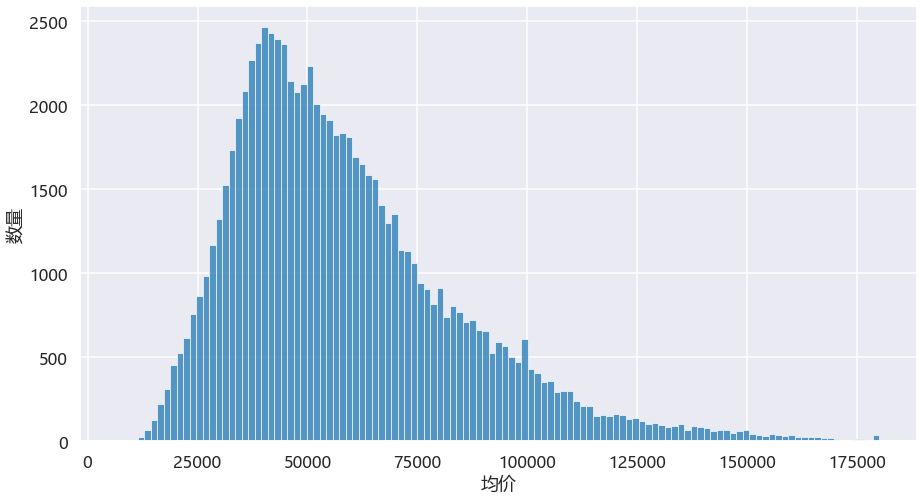

In [46]:
# 均价直方图
plt.figure(figsize=(15,8))
sns.set_context("talk")
sns.histplot(data.均价).set(ylabel='数量')

In [47]:
# 箱线图
x_data = list(data['地区'].unique())
y_data = [data[data['地区']==x]['均价'].to_list() for x in x_data]

Box = (Boxplot(init_opts=opts.InitOpts(theme='dark', width='800px'))
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房均价箱型图",
                                         subtitle='数据采集日期：2020年12月'),
                    )
      ) 
Box.add_xaxis(x_data)
Box.add_yaxis("", Box.prepare_data(y_data))
Box.render_notebook()

In [48]:
diquPrice = data.groupby('地区',as_index=False)['均价'].mean().sort_values('均价',ascending=False).reset_index(drop=True)

In [49]:
diquPrice

,地区,均价
0,西城,110559.157703
1,东城,95725.685733
2,海淀,83582.096945
3,朝阳,66201.252804
4,丰台,56892.015149
5,石景山,51798.169725
6,通州,42892.449693
7,亦庄开发区,41295.097159
8,昌平,41093.301601
9,大兴,40975.726590


In [50]:
# 绘制柱状图
bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='800px'))
    .add_xaxis(diquPrice['地区'].to_list())
    .add_yaxis('', diquPrice['均价'].round(0).to_list())
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{c}'),
                     markline_opts=opts.MarkLineOpts(
                         data=[opts.MarkLineItem(y=data.均价.mean(), name="平均值")])
                    )
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房均价",
                                         subtitle='数据采集日期：2020年12月'),
                    )   

)

bar.render_notebook()

In [51]:
xiaoquPrice = data.groupby('地址',as_index=False)['均价'].mean().sort_values('均价',ascending=False).reset_index(drop=True)

In [52]:
xiaoquPrice.head(10)

,地址,均价
0,中信国安府,179983.000000
1,鲍家街,179974.000000
2,西镇江胡同,179907.000000
3,北京壹号院,179893.000000
4,德外大街12号院,179827.000000
5,大觉胡同,179383.000000
6,万城华府,177898.333333
7,王府仓胡同10号院,177319.000000
8,丰融园,177231.500000
9,宏汇园小区,175478.500000


In [53]:
# 绘制柱状图
# 最贵小区前10强
bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='800px'))
    .add_xaxis(xiaoquPrice['地址'].head(10).to_list())
    .add_yaxis('', xiaoquPrice['均价'].round(0).to_list())
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{c}'),
                     markline_opts=opts.MarkLineOpts(
                         data=[opts.MarkLineItem(y=data.均价.mean(), name="平均值")])
                    )
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
                     title_opts=opts.TitleOpts(title="贝壳北京二手房最贵小区前10强(均价)",
                                         subtitle='数据采集日期：2020年12月'),
                     yaxis_opts=opts.AxisOpts(min_=50000, max_=200000)
                    )   
#     .reversal_axis()
)

bar.render_notebook()

In [54]:
xiaoquP = data.groupby(['地区','地址'],as_index=False)['均价'].mean().sort_values('均价',ascending=False).reset_index(drop=True)
xiaoquP = xiaoquP[xiaoquP['地址']!='']
xiaoquP['均价'] = xiaoquP['均价'].round(0)

In [55]:
# 绘制组合图
bar1 = (Bar()
       .add_xaxis(xiaoquP[xiaoquP['地区']=='朝阳'].head()['地址'].to_list())
       .add_yaxis('朝阳区', xiaoquP[xiaoquP['地区']=='朝阳'].head()['均价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="5%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区的小区二手房均价前5名",
                                         subtitle='数据采集日期：2020年12月'))
       )

bar2 = (Bar()
       .add_xaxis(xiaoquP[xiaoquP['地区']=='海淀'].head()['地址'].to_list())
       .add_yaxis('海淀区', xiaoquP[xiaoquP['地区']=='海淀'].head()['均价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

bar3 = (Bar()
       .add_xaxis(xiaoquP[xiaoquP['地区']=='丰台'].head()['地址'].to_list())
       .add_yaxis('丰台区', xiaoquP[xiaoquP['地区']=='丰台'].head()['均价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%", pos_top="5%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)))
       )

bar4 = (Bar()
       .add_xaxis(xiaoquP[xiaoquP['地区']=='昌平'].head()['地址'].to_list())
       .add_yaxis('昌平区', xiaoquP[xiaoquP['地区']=='昌平'].head()['均价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

grid = (Grid(init_opts=opts.InitOpts(theme='dark', width='800px',))
        .add(bar1,grid_opts=opts.GridOpts(pos_bottom="60%", pos_right="60%"))
        .add(bar2,grid_opts=opts.GridOpts(pos_top="60%",pos_right="60%"))
        .add(bar3,grid_opts=opts.GridOpts(pos_bottom="60%", pos_left="60%"))
        .add(bar4,grid_opts=opts.GridOpts(pos_top="60%",pos_left="60%"))
        
        )
grid.render_notebook()

### 各地区二手房总价

In [56]:
#房价均价分布（1000万以内）
data[data['总价']<1000].总价.mean()

458.2997917446772

[Text(0, 0.5, '数量')]

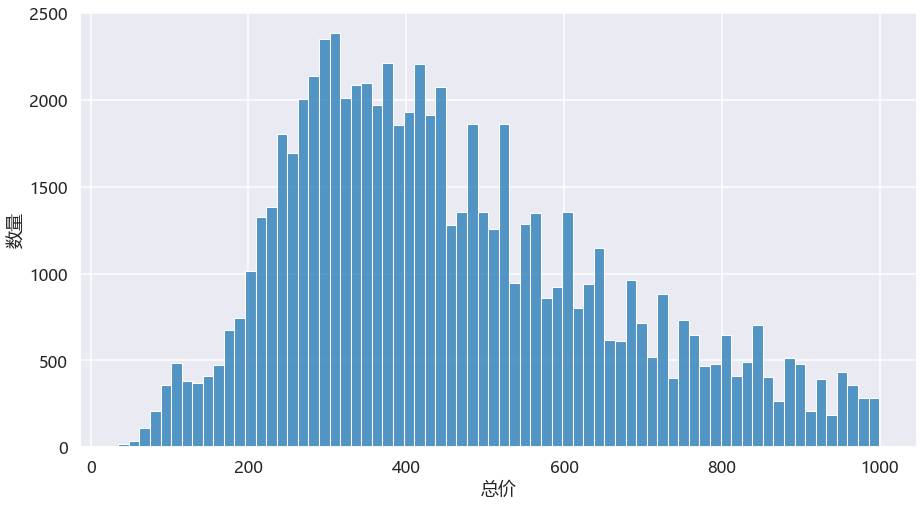

In [57]:
# 总价直方图
plt.figure(figsize=(15,8))
sns.set_context("talk")
sns.histplot(data[data['总价']<1000].总价).set(ylabel='数量')

In [58]:
#房价均价分布（1000万以上）
data[data['总价']>=1000].总价.mean()

1606.2204952970592

In [59]:
# 箱线图
x_data = list(data['地区'].unique())
y_data = [data[(data['地区']==x)&(data['总价']<1000)]['总价'].to_list() for x in x_data]

Box = (Boxplot(init_opts=opts.InitOpts(theme='dark', width='800px'))
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房总价箱型图(1000万以内)",
                                         subtitle='数据采集日期：2020年12月'),
                    )
      ) 
Box.add_xaxis(x_data)
Box.add_yaxis("", Box.prepare_data(y_data))
Box.render_notebook()

In [60]:
# 房子总价1000万以上分布
data[data['总价']>=1000].groupby('地区',as_index=False)['房子ID'].nunique().sort_values('房子ID',ascending=False).reset_index(drop=True)

,地区,房子ID
0,朝阳,3417
1,海淀,1472
2,西城,943
3,东城,635
4,丰台,513
5,昌平,397
6,大兴,279
7,顺义,240
8,通州,192
9,亦庄开发区,117


In [61]:
xiaoquTotalPrice = data.groupby('地址',as_index=False)['总价'].mean().sort_values('总价',ascending=False).reset_index(drop=True)

In [62]:
# 绘制柱状图
# 总价最贵小区前10强
bar = (
    Bar(init_opts=opts.InitOpts(theme='dark', width='800px'))
    .add_xaxis(xiaoquTotalPrice['地址'].head(10).to_list())
    .add_yaxis('', xiaoquTotalPrice['总价'].round(0).to_list())
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{c}'),
#                      markline_opts=opts.MarkLineOpts(
#                          data=[opts.MarkLineItem(y=data.均价.mean(), name="平均值")])
                    )
    .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)),
                     title_opts=opts.TitleOpts(title="贝壳北京二手房最贵小区前10强(总价)",
                                         subtitle='数据采集日期：2020年12月'),
#                     yaxis_opts=opts.AxisOpts(min_=50000, max_=200000)
                    )   
#     .reversal_axis()
)

bar.render_notebook()

In [63]:
xiaoquTP = data.groupby(['地区','地址'],as_index=False)['总价'].mean().sort_values('总价',ascending=False).reset_index(drop=True)
xiaoquTP = xiaoquTP[xiaoquTP['地址']!='']
xiaoquTP['总价'] = xiaoquTP['总价'].round(0)

In [64]:
# 绘制组合图
bar1 = (Bar()
       .add_xaxis(xiaoquTP[xiaoquTP['地区']=='朝阳'].head()['地址'].to_list())
       .add_yaxis('朝阳区', xiaoquTP[xiaoquTP['地区']=='朝阳'].head()['总价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="5%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区的小区二手房总价前5名",
                                         subtitle='数据采集日期：2020年12月'))
       )

bar2 = (Bar()
       .add_xaxis(xiaoquTP[xiaoquTP['地区']=='海淀'].head()['地址'].to_list())
       .add_yaxis('海淀区', xiaoquTP[xiaoquTP['地区']=='海淀'].head()['总价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_right="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

bar3 = (Bar()
       .add_xaxis(xiaoquTP[xiaoquTP['地区']=='丰台'].head()['地址'].to_list())
       .add_yaxis('丰台区', xiaoquTP[xiaoquTP['地区']=='丰台'].head()['总价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%", pos_top="5%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)))
       )

bar4 = (Bar()
       .add_xaxis(xiaoquTP[xiaoquTP['地区']=='昌平'].head()['地址'].to_list())
       .add_yaxis('昌平区', xiaoquTP[xiaoquTP['地区']=='昌平'].head()['总价'].to_list())
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True, pos_left="70%",pos_top="52%"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=30)))
       )

grid = (Grid(init_opts=opts.InitOpts(theme='dark', width='800px',))
        .add(bar1,grid_opts=opts.GridOpts(pos_bottom="60%", pos_right="60%"))
        .add(bar2,grid_opts=opts.GridOpts(pos_top="60%",pos_right="60%"))
        .add(bar3,grid_opts=opts.GridOpts(pos_bottom="60%", pos_left="60%"))
        .add(bar4,grid_opts=opts.GridOpts(pos_top="60%",pos_left="60%"))
        
        )
grid.render_notebook()

### 各地区二手房面积

In [65]:
data.面积 = data.面积.astype(float)

In [66]:
data.sort_values(by='面积')

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
29518,101109843101,京投银泰琨御府,225.0,万,163044,2,海淀,bp200ep250,1室1厅,高楼层,10,2015,13.80,北,1月
3047,101106940975,茶贸国际中心,50.0,万,32680,132,西城,bp0ep200,1室0厅,中楼层,21,2008,15.30,东,9月
7285,101108749668,奥北南区,55.0,万,35854,34,朝阳,bp0ep200,1室0厅,低楼层,27,2008,15.34,南,4月
69833,101110147325,樱花园一区,93.0,万,57872,1,顺义,bp0ep200,1室0厅,底层,6,None,16.07,南,NaN
15,101101915230,华人一品大厦,70.0,万,43425,393,东城,bp0ep200,1室0厅,低楼层,3,2007,16.12,南,3年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74169,101104423479,富力湾,3300.0,万,31629,105,顺义,bp1000ep100000,5室2厅,底层,2,2006,1043.36,东南西北,1年
47103,101104088863,国际花园,7880.0,万,67416,23,丰台,bp1000ep100000,9室4厅,底层,3,2002,1168.87,南北,1年
7098,101108990621,鹞儿胡同,11000.0,万,93419,62,西城,bp1000ep100000,8室2厅,底层,1,1940,1177.50,南北,4月
78998,101101119874,青龙湖公寓,3100.0,万,23473,171,房山,bp1000ep100000,8室4厅,底层,4,2005,1320.68,南北,3年


[Text(0, 0.5, '数量')]

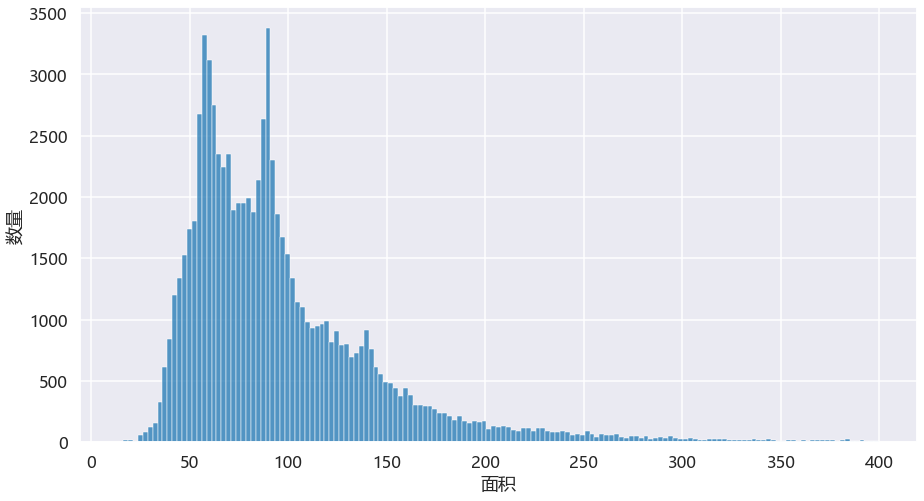

In [67]:
# 面积直方图 （去掉400以上面积的）
plt.figure(figsize=(15,8))
sns.set_context("talk")
sns.histplot(data[data['面积']<400].面积).set(ylabel='数量')

In [68]:
# 箱线图
x_data = list(data['地区'].unique())
y_data = [data[(data['地区']==x)&(data['面积']<400)]['面积'].to_list() for x in x_data]

Box = (Boxplot(init_opts=opts.InitOpts(theme='dark', width='800px'))
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房面积箱型图(400平以内)",
                                         subtitle='数据采集日期：2020年12月'),
                    )
      ) 
Box.add_xaxis(x_data)
Box.add_yaxis("", Box.prepare_data(y_data))
Box.render_notebook()

### 各地区二手房年限

In [69]:
data.sort_values(by='建筑年份')

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间
7098,101108990621,鹞儿胡同,11000.0,万,93419,62,西城,bp1000ep100000,8室2厅,底层,1,1940,1177.50,南北,4月
6952,101102471513,阜成门外大街,1000.0,万,85970,324,西城,bp800ep1000,4室1厅,顶层,5,1950,116.32,南北,2年
4692,101104621021,阜成门外大街,680.0,万,90210,108,西城,bp600ep700,2室1厅,中楼层,5,1950,75.38,南,1年
4064,101101947999,虎坊路小区,500.0,万,109171,58,西城,bp400ep500,2室1厅,中楼层,4,1950,45.80,南北,3年
47822,101108743686,永乐东区,265.0,万,39365,34,石景山,bp250ep300,2室1厅,顶层,4,1950,67.32,南北,4月
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80817,101108512949,颖泽洲社区,310.0,万,20656,1,延庆,bp300ep400,3室2厅,顶层,6,None,150.08,南北,5月
80818,101108779946,清凉盛景,1000.0,万,46594,4,延庆,bp800ep1000,3室2厅,底层,2,None,214.62,南北,4月
80822,101109289995,龙聚山庄,490.0,万,13098,77,延庆,bp400ep500,6室2厅,底层,4,None,374.13,北西南,3月
80823,101108079452,阳光假日金棕苑一期,698.0,万,26982,241,延庆,bp600ep700,5室2厅,底层,2,None,258.70,东南西北,6月


In [70]:
data['建筑年份'] = data['建筑年份'].fillna(2022)

In [71]:
data['年限'] = 2020 - data['建筑年份'].astype(int)+1

[Text(0, 0.5, '数量')]

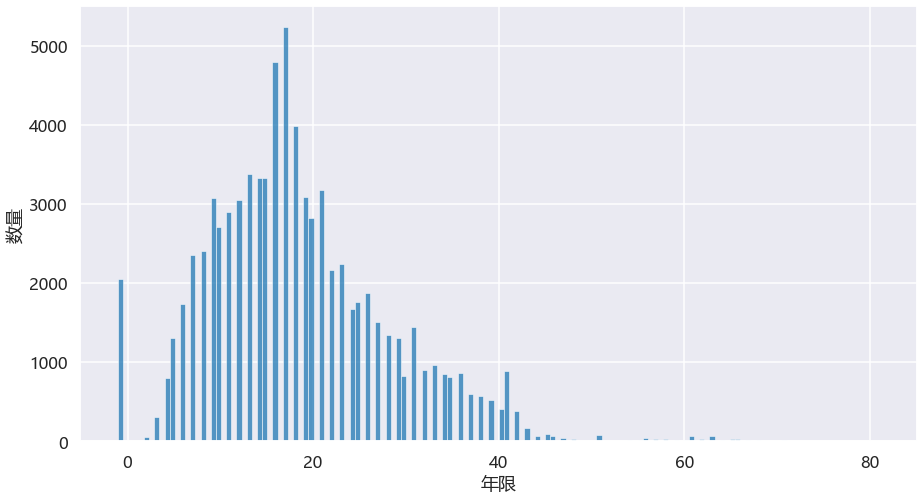

In [72]:
# 面积直方图 （去掉400以上面积的）
plt.figure(figsize=(15,8))
sns.set_context("talk")
sns.histplot(data.年限).set(ylabel='数量')

In [73]:
# 箱线图
x_data = list(data['地区'].unique())
y_data = [data[data['地区']==x]['年限'].to_list() for x in x_data]

Box = (Boxplot(init_opts=opts.InitOpts(theme='dark', width='800px'))
       .set_global_opts(legend_opts=opts.LegendOpts(is_show=True),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     title_opts=opts.TitleOpts(title="贝壳北京各区二手房建筑年限箱型图",
                                         subtitle='数据采集日期：2020年12月'),
                    )
      ) 
Box.add_xaxis(x_data)
Box.add_yaxis("", Box.prepare_data(y_data))
Box.render_notebook()

### 各地区二手房【价格-地区】数量分布

In [74]:
data.head()

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间,年限
0,101107794794,MOHO国际写字楼,95.0,万,38338,119,东城,bp0ep200,1室1厅,中楼层,9,2007,24.78,北,7月,14
1,101106836513,MOHO国际写字楼,168.0,万,50649,27,东城,bp0ep200,1室0厅,顶层,9,2007,33.17,南,10月,14
2,101105864253,自由季,175.0,万,39540,155,东城,bp0ep200,1室1厅,底层,10,2010,44.26,西,1年,11
3,101104054558,天华公馆,173.0,万,54921,120,东城,bp0ep200,1室0厅,中楼层,6,2009,31.50,西,1年,12
4,101109598183,自由季,168.0,万,37202,13,东城,bp0ep200,1室1厅,底层,10,2010,45.16,西,2月,11


In [75]:
data.户型 = data.户型.str.replace(r'[5-9]室\d厅','5居室以上')

In [76]:
dataPriceRange = data.pivot_table(values='房子ID',index='地区',columns='价格区间',aggfunc='count').fillna(0)

In [77]:
dataPriceRange = dataPriceRange.astype(int)

In [78]:
dataPriceRange.columns = ['bp0ep200', 'bp200ep250', 'bp250ep300', 'bp300ep400',
       'bp400ep500', 'bp500ep600', 'bp600ep700', 'bp700ep800', 'bp800ep1000', 'bp1000ep100000']

In [79]:
dataPriceRange

,bp0ep200,bp200ep250,bp250ep300,bp300ep400,bp400ep500,bp500ep600,bp600ep700,bp700ep800,bp800ep1000,bp1000ep100000
地区,,,,,,,,,,
东城,18,624,9,20,142,363,513,469,382,467
丰台,248,490,611,1301,2609,2000,1312,903,589,631
亦庄开发区,150,115,98,102,166,144,92,74,55,95
大兴,515,276,789,1267,1679,977,461,268,205,216
密云,185,14,76,38,41,22,5,2,6,10
平谷,28,0,40,32,23,6,3,4,1,0
延庆,19,1,11,9,2,1,0,1,0,2
怀柔,18,11,15,31,39,11,8,4,7,6
房山,1102,27,898,692,1123,514,214,144,63,50


[Text(0.5, 1.0, '不同地区各总价区间房源数')]

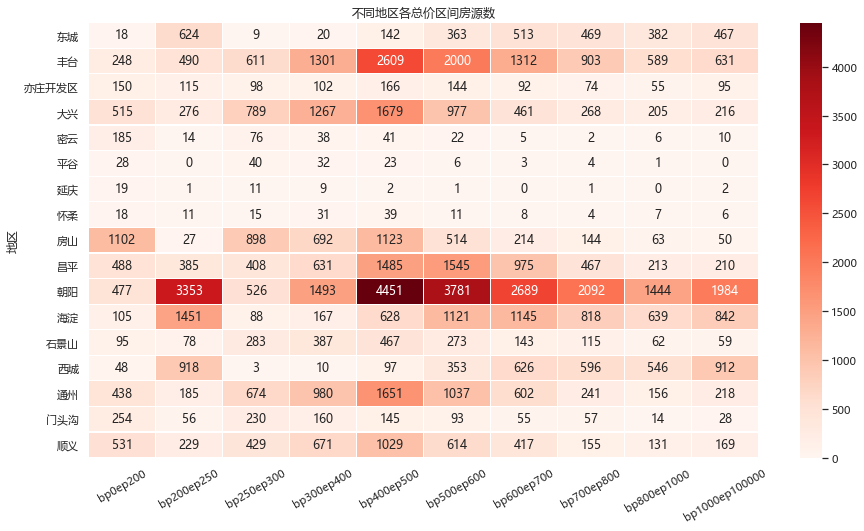

In [80]:
# 房价区间热力图
plt.figure(figsize=(15,8))
# sns.set_context("talk")
sns.set_context("notebook")
ax = sns.heatmap( dataPriceRange, cmap='Reds', annot=True, fmt='0.0f',linewidths=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set(title= "不同地区各总价区间房源数")

### 各地区二手房【户型-价格】数量分布

In [81]:
datahuxingP = data.pivot_table(values='房子ID',index='户型',columns='价格区间',aggfunc='count').fillna(0)

In [82]:
datahuxingP.columns = ['bp0ep200', 'bp200ep250', 'bp250ep300', 'bp300ep400',
       'bp400ep500', 'bp500ep600', 'bp600ep700', 'bp700ep800', 'bp800ep1000', 'bp1000ep100000']

[Text(0.5, 1.0, '不同户型在各总价区间房源数')]

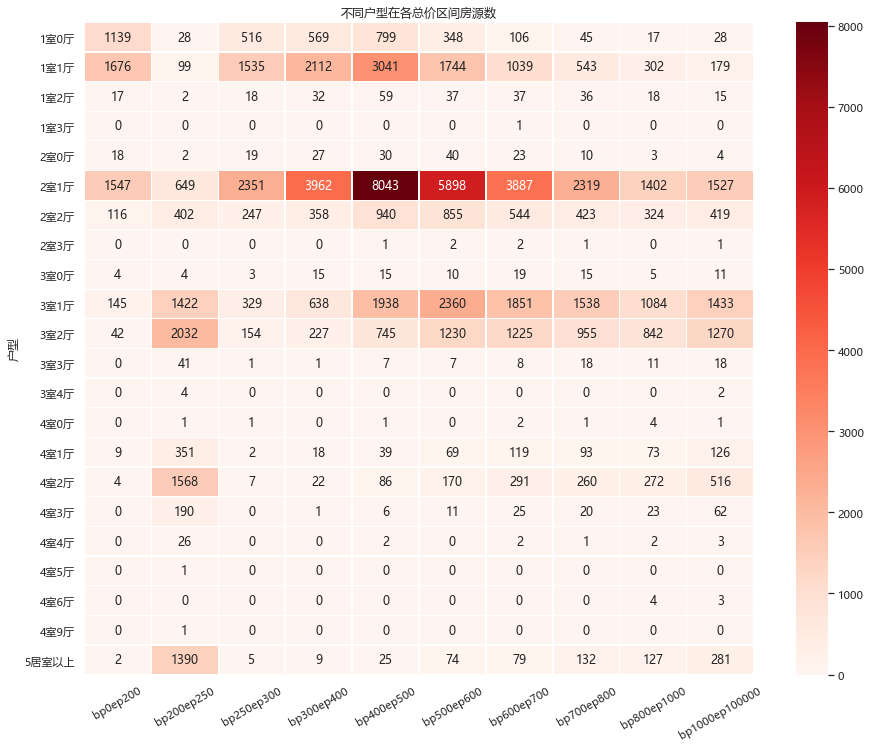

In [83]:
# 户型热力图
plt.figure(figsize=(15,12))
# sns.set_context("talk")
sns.set_context("notebook")
ax = sns.heatmap( datahuxingP, cmap='Reds', annot=True, fmt='0.0f',linewidths=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set(title= "不同户型在各总价区间房源数")

### 各地区二手房【户型-地区】数量分布

In [84]:
datahuxing = data.pivot_table(values='房子ID',index='户型',columns='地区',aggfunc='count').fillna(0)

In [85]:
huxing = sorted(data.户型.unique())

[Text(0.5, 1.0, '不同地区各户型房源数')]

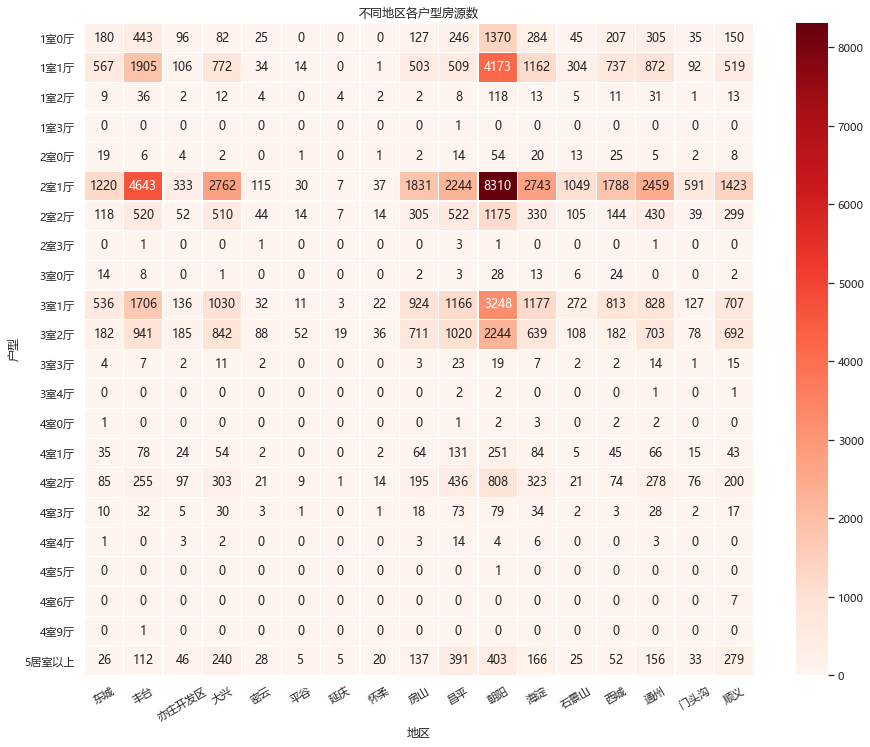

In [86]:
# 户型热力图
plt.figure(figsize=(15,12))
# sns.set_context("talk")
sns.set_context("notebook")
ax = sns.heatmap( datahuxing, cmap='Reds', annot=True, fmt='0.0f',linewidths=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set(title= "不同地区各户型房源数")

### 各地区二手房【户型-地区】均价分布

In [87]:
datahuxing = data.pivot_table(values='均价',index='户型',columns='地区',aggfunc='mean')

[Text(0.5, 1.0, '不同地区各户型均价(元/平米)')]

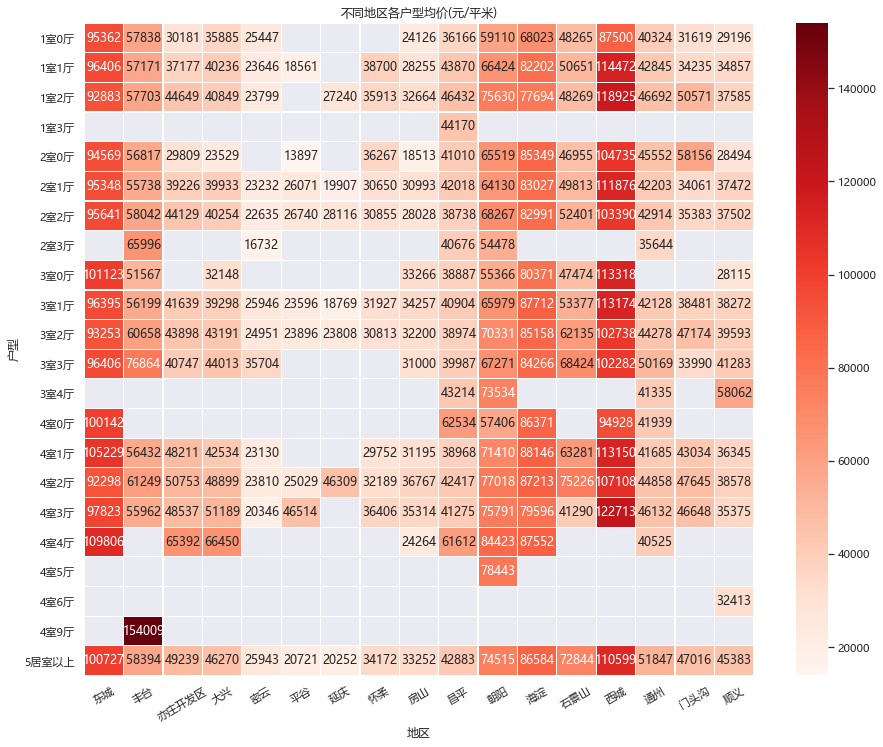

In [88]:
# 户型热力图
plt.figure(figsize=(15,12))
# sns.set_context("talk")
sns.set_context("notebook")
ax = sns.heatmap( datahuxing, cmap='Reds', annot=True, fmt='0.0f',linewidths=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set(title= "不同地区各户型均价(元/平米)")

## 3.房源标题及地址小区词云

In [96]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  3 14:14:14 2020

@author: gongdc
"""

import pandas as pd
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

def ciYun(data,addWords,stopWords):
    '''
    Parameters
    ----------
    data : list
        需要用于制作词云的文本内容列表.
    addWords : list
        自定义词典列表.
    stopWords : list
        停用词列表.
    Returns
    -------
    None.
    '''
    print('\n正在作图...')
    comment_data = []
    
    for item in data:
        if pd.isnull(item) == False:
            comment_data.append(item)
    # 添加自定义词典 
    for addWord in addWords:
        jieba.add_word(addWord)

    comment_after_split = jieba.cut(str(comment_data), cut_all=False)
    words = ' '.join(comment_after_split)
    
    # 词云停用词 
    stopwords = STOPWORDS.copy()
    for stopWord in stopWords:
        stopwords.add(stopWord)
    
    # bg=np.array(Image.open(r"C:\Users\gongdc\Desktop\sgyx.png"))
    # mask=bg
    # 改字体是我喜欢用的，大家如果没有可以设置为自己本机环境带有的字体哈
    wc = WordCloud(width=1080, height=960, background_color='black', font_path='C:\Windows\Fonts\FZZJ-YGYTKJW.ttf', stopwords=stopwords, max_font_size=400, random_state=50)
    wc.generate_from_text(words)
     
    plt.figure(figsize=(20, 16))
    plt.imshow(wc)
    plt.axis('off')
    #plt.savefig(r'F:\词云\词云.png')
    plt.show()
    
    print('词云已生成~')


正在作图...


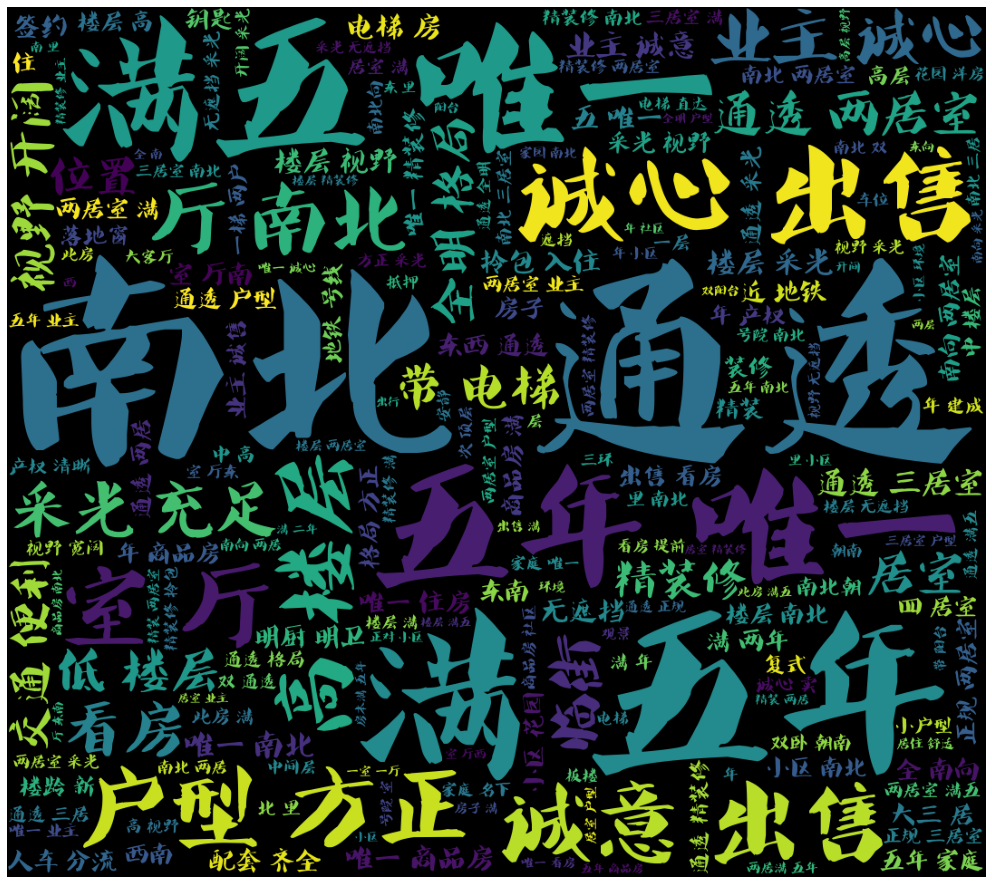

词云已生成~


In [97]:
# 房源标题 词云生成   
dataList = houseData.标题.to_list()
# 自定义词典
addWords = []
# 添加停用词
stoptxt = pd.read_table(r'C:\Users\Gdc\Desktop\stop.txt',encoding='utf-8',header=None)
stoptxt.drop_duplicates(inplace=True)
stopWords = stoptxt[0].to_list()
words = []
stopWords.extend(words)    

# 运行~
ciYun(dataList,addWords,stopWords)


正在作图...


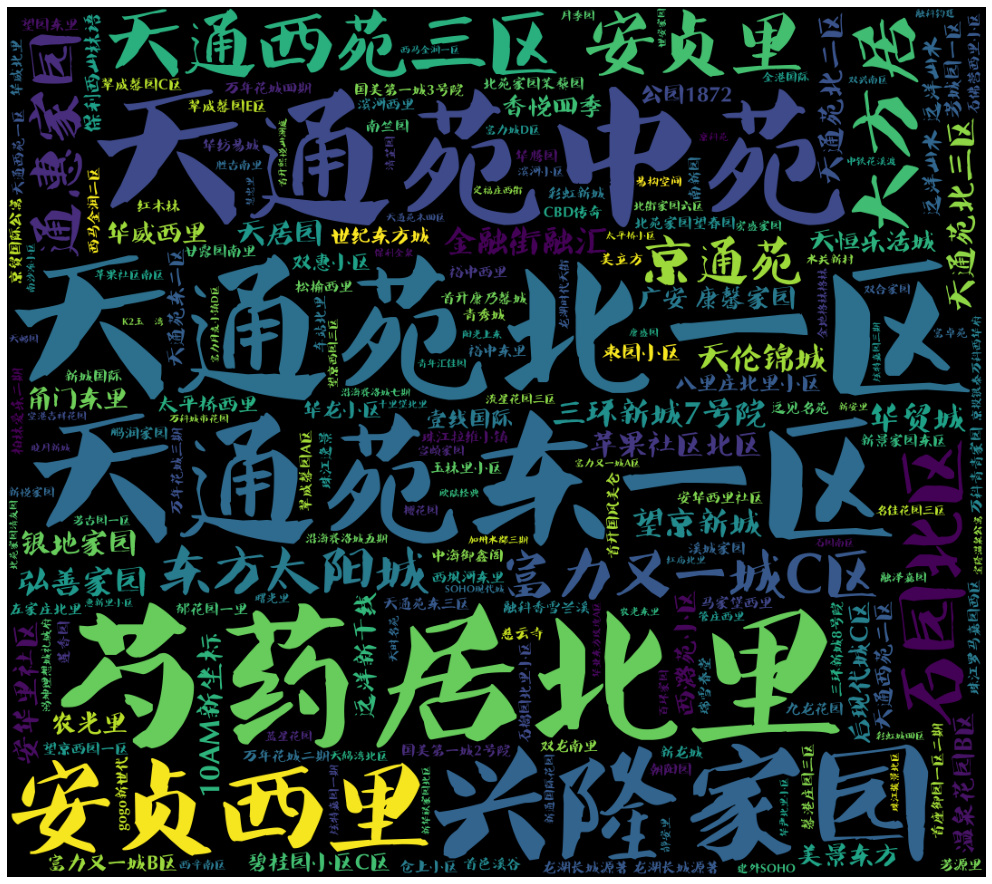

词云已生成~


In [100]:
# 房源地址（小区） 词云生成   
dataList = houseData.地址.to_list()
# 自定义词典
addWords = data.地址.to_list()
# 添加停用词
stoptxt = pd.read_table(r'C:\Users\Gdc\Desktop\stop.txt',encoding='utf-8',header=None)
stoptxt.drop_duplicates(inplace=True)
stopWords = stoptxt[0].to_list()
words = []
stopWords.extend(words)    

# 运行~
ciYun(dataList,addWords,stopWords)

In [102]:
data.sort_values(by='关注人数')

,房子ID,地址,总价,总价单位,均价,关注人数,地区,价格区间,户型,楼层,楼高,建筑年份,面积,朝向,发布时间,年限
77891,101107407143,首开熙悦广场,310.0,万,35405,0,房山,bp300ep400,3室1厅,低楼层,16,2017,87.56,东南,8月,4
44662,101109981102,梅源里小区,460.0,万,54736,0,丰台,bp400ep500,3室1厅,中楼层,17,1997,84.04,南北,NaN,24
27192,101109299297,嘉和丽园,1380.0,万,77760,0,朝阳,bp1000ep100000,3室1厅,高楼层,28,2001,177.47,东,3月,20
21586,101105990543,润枫德尚苑,1000.0,万,70488,0,朝阳,bp800ep1000,2室1厅,高楼层,24,2004,141.87,西,1年,17
63558,101110184821,车站北里,220.0,万,43419,0,大兴,bp200ep250,2室1厅,中楼层,6,1986,50.67,东北,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,101102665183,石榴园南里小区,205.0,万,41256,1769,丰台,bp200ep250,1室1厅,低楼层,9,1998,49.69,西,2年,23
39738,101107890747,石榴园南里小区,303.0,万,44016,2040,丰台,bp300ep400,2室1厅,中楼层,12,1998,68.84,南北,7月,23
1126,101106129262,华龙美晟,520.0,万,69510,2658,东城,bp500ep600,2室1厅,高楼层,12,2009,74.81,南,1年,12
36967,101103481769,宋家庄家园,205.0,万,39876,3003,丰台,bp200ep250,1室1厅,底层,29,2011,51.41,西,2年,10


In [103]:
data.to_excel(r'F:\PythonCool\爬虫数据分析\贝壳2手房\data.xlsx', index=None)

In [ ]:
# 小提琴图
plt.figure(figsize=(15,8))
sns.violinplot(x='地区', y='房间大小', hue='类型', data=data[data['类型']!='豪宅'], split=True)

In [ ]:
# 小提琴图
plt.figure(figsize=(15,8))
sns.violinplot(x='地区', y='price', hue='类型', data=data[data['类型']!='豪宅'], split=True)

In [ ]:
data_table = data[data['类型']=='合租'].pivot_table(values='price',index='卧室朝向',columns='地区',aggfunc='mean')

In [ ]:
# 卧室朝向价格热力图
plt.figure(figsize=(15,8))
# sns.set_context("talk")
sns.set_context("notebook")
sns.heatmap( data_table, cmap='Reds', annot=True, fmt='0.2f', linewidths=0.2)

In [ ]:
# 回归图
plt.figure(figsize=(15,8))
sns.set_context("talk")
sns.regplot(x='距离地铁站距离', y='price', data=score)